<a href="https://colab.research.google.com/github/gilbert-umuzi/MultiWOZ-SGD-benchmarks/blob/main/SDG_benchmark_horizon_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [ ]:
import pandas as pd
import csv

# Create a list of dictionaries from the updated data table
updated_data = [
    # Original entries (with updates/additions from new data)
    {'Model': 'SUMBT', 'Year': 2019.5, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.0', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 42.4, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BERT-based'},
    {'Model': 'SimpleTOD', 'Year': 2020.4, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 55.8, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-2 based'},
    {'Model': 'SimpleTOD', 'Year': 2020.4, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 70.5, 'Setting': 'Fine-tuned (E2E)', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-2 based'},
    {'Model': 'TripPy', 'Year': 2020.5, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 55.3, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BERT-based'},
    {'Model': 'T5 (Fine-tuned)', 'Year': 2021.5, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1+', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 75.0, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper (Estimate)', 'Base_Model_Note': 'T5'},
    {'Model': 'T5 (Fine-tuned)', 'Year': 2021.5, 'Benchmark': 'SGD', 'Benchmark_Version': 'Original', 'Subset': 'Unseen', 'Metric': 'JGA', 'Score(%)': 70.0, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper (Estimate)', 'Base_Model_Note': 'T5'},
    {'Model': 'Flan-T5 (Fine-tuned)', 'Year': 2022.8, 'Benchmark': 'SGD', 'Benchmark_Version': 'Original', 'Subset': 'Unseen', 'Metric': 'JGA', 'Score(%)': 75.0, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper (Estimate)', 'Base_Model_Note': 'Flan-T5'},
    {'Model': 'GPT-3.5 (`text-davinci-003`)', 'Year': 2022.9, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': 'Unknown', 'Subset': 'Overall', 'Metric': 'SR (Human)', 'Score(%)': 57.1, 'Setting': 'Few-Shot', 'Eval_Method': 'Few-Shot (Human Eval)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-3 series'},
    {'Model': 'GPT-3.5-Turbo', 'Year': 2022.9, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.2', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 58.6, 'Setting': 'Zero-shot (FuncCall)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-3 series'},
    {'Model': 'GPT-4', 'Year': 2023.3, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': 'Unknown', 'Subset': 'Overall', 'Metric': 'SR (Human)', 'Score(%)': 76.0, 'Setting': 'Few-Shot', 'Eval_Method': 'Few-Shot (Human Eval)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4'},
    {'Model': 'SPLAT (Large)', 'Year': 2023.5, 'Benchmark': 'SGD', 'Benchmark_Version': 'Original', 'Subset': 'Unseen', 'Metric': 'JGA', 'Score(%)': 82.2, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Longformer-large'},
    {'Model': 'SPLAT (Large)', 'Year': 2023.5, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.2', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 57.4, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Longformer-large'},
    {'Model': 'LLaMA 1/2 (Fine-tuned)', 'Year': 2023.5, 'Benchmark': 'SGD', 'Benchmark_Version': 'Original', 'Subset': 'Unseen', 'Metric': 'JGA', 'Score(%)': 75.0, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper (Estimate)', 'Base_Model_Note': 'Llama 1/2'},
    {'Model': 'GPT-4-Turbo', 'Year': 2023.8, 'Benchmark': 'SGD', 'Benchmark_Version': 'Original', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 88.7, 'Setting': 'Zero-shot (SRP)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4 series'},
    {'Model': 'GPT-4-Turbo', 'Year': 2023.8, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 79.6, 'Setting': 'Zero-shot (SRP)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4 series'},

    # New entries from the updated data
    {'Model': 'FnCTOD (GPT-3.5-Turbo)', 'Year': 2024.1, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 38.6, 'Setting': 'Zero-shot (FuncCall)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-3.5 series'},
    {'Model': 'FnCTOD (GPT-4)', 'Year': 2024.1, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 38.7, 'Setting': 'Zero-shot (FuncCall)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4 series'},
    {'Model': 'Llama3-8B-Instruct', 'Year': 2024.3, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.2', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 55.9, 'Setting': 'Few-Shot (5ex FuncCall)', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 3 8B'},
    {'Model': 'Llama3-70B-Instruct', 'Year': 2024.3, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.2', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 72.4, 'Setting': 'Few-Shot (5ex FuncCall)', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 3 70B'},
    {'Model': 'Llama 3 (70B Instruct)', 'Year': 2024.3, 'Benchmark': 'SGD', 'Benchmark_Version': 'Original', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 76.3, 'Setting': 'Zero-shot (SRP)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 3 70B'},
    {'Model': 'Llama 3 (70B Instruct)', 'Year': 2024.3, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 66.2, 'Setting': 'Zero-shot (SRP)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 3 70B'},
    {'Model': 'CoALM 70B', 'Year': 2024.4, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 43.8, 'Setting': 'Zero-shot (AutoTOD)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 2 70B based'},
    {'Model': 'CoALM 70B', 'Year': 2024.4, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 69.4, 'Setting': 'Zero-shot (AutoTOD)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 2 70B based'},
    {'Model': 'CoALM 405B', 'Year': 2024.4, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 38.8, 'Setting': 'Zero-shot (AutoTOD)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 2 based (?)'},
    {'Model': 'CoALM 405B', 'Year': 2024.4, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 66.7, 'Setting': 'Zero-shot (AutoTOD)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 2 based (?)'},
    {'Model': 'GPT-4o', 'Year': 2024.5, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 36.9, 'Setting': 'Zero-shot (AutoTOD)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4 series'},
    {'Model': 'GPT-4o', 'Year': 2024.5, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 75.5, 'Setting': 'Zero-shot (AutoTOD)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4 series'},
    {'Model': 'S3-DST (GPT-4)', 'Year': 2024.8, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 45.1, 'Setting': 'Zero-shot (PAR)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4 series'},
    {'Model': 'S3-DST (GPT-4)', 'Year': 2024.8, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 53.3, 'Setting': 'Zero-shot (PAR)', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4 series'},
    {'Model': 'CORRECTIONLM (Llama 3 8B)', 'Year': 2024.8, 'Benchmark': 'SGD', 'Benchmark_Version': 'Original', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 37.8, 'Setting': 'Few-Shot (5%)+Corr', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 3 8B'},
    {'Model': 'CORRECTIONLM (Llama 3 8B)', 'Year': 2024.8, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 56.2, 'Setting': 'Few-Shot (5%)+Corr', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Llama 3 8B'},
    {'Model': 'IDIC-DST (CodeLlama 7B)', 'Year': 2024.9, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 44.3, 'Setting': 'Few-Shot (5% data)', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'CodeLlama 7B'},
    {'Model': 'IDIC-DST (CodeLlama 7B)', 'Year': 2024.9, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 52.7, 'Setting': 'Few-Shot (1% data)', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'CodeLlama 7B'},
    {'Model': 'NL-DST (LLM)', 'Year': 2025.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 65.9, 'Setting': 'Fine-tuned (NL Gen)', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Unknown LLM'},

    # Additional entries from MultiWOZ.pdf
    {'Model': 'MTTOD', 'Year': 2021.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 20.25, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Seq2Seq'},
    {'Model': 'GALAXY', 'Year': 2021.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 20.5, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BERT-based'},
    {'Model': 'HDNO', 'Year': 2020.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.0', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 18.85, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BERT-based'},
    {'Model': 'LAVA', 'Year': 2020.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 94.8, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BERT-based'},
    {'Model': 'DORA', 'Year': 2021.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 91.1, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-2 based'},
    {'Model': 'TOATOD', 'Year': 2023.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.2', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 63.79, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BART-based'},
    {'Model': 'DAIR', 'Year': 2022.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.2', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 59.98, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BERT-based'},
    {'Model': 'D3ST', 'Year': 2022.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.2', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 58.7, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BERT-based'},
    {'Model': 'SPACE-3', 'Year': 2022.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.2', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 57.5, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'BERT-based'},

    # Additional entries from SGD data.pdf
    {'Model': 'InstructDial', 'Year': 2022.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 52.0, 'Setting': 'Few-Shot', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Instruction Tuning'},
    {'Model': 'IC-DST (Codex)', 'Year': 2022.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Domain-Specific', 'Metric': 'JGA', 'Score(%)': 56.45, 'Setting': 'Few-Shot ICL', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Codex'},
    {'Model': 'SG-USM', 'Year': 2023.0, 'Benchmark': 'SGD', 'Benchmark_Version': 'Original', 'Subset': 'Unseen', 'Metric': 'User Satisfaction', 'Score(%)': 78.0, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Schema-based'},
    {'Model': 'PPTOD', 'Year': 2022.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 57.45, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'T5-based'},
    {'Model': 'PPTOD', 'Year': 2022.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 79.08, 'Setting': 'Fine-tuned', 'Eval_Method': 'Fine-tuned (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'T5-based'},
    {'Model': 'UnifiedTOD', 'Year': 2024.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.4', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 57.0, 'Setting': 'Zero-shot', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Autonomous agent'},
    {'Model': 'Unsupervised-TOD', 'Year': 2024.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'SR', 'Score(%)': 70.0, 'Setting': 'Unsupervised E2E', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Noisy channel'},
    {'Model': 'Mixtral 8x7B', 'Year': 2024.1, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Overall', 'Metric': 'JGA', 'Score(%)': 68.0, 'Setting': 'Zero-shot', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'Mixtral'},
    {'Model': 'InstructTODS (GPT-4)', 'Year': 2023.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Domain-Specific', 'Metric': 'JGA', 'Score(%)': 48.16, 'Setting': 'Zero-shot', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-4'},
    {'Model': 'InstructTODS (GPT-3)', 'Year': 2023.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Domain-Specific', 'Metric': 'JGA', 'Score(%)': 42.02, 'Setting': 'Zero-shot', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-3'},
    {'Model': 'FNCTOD (LLAMA2-13B)', 'Year': 2024.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Domain-Specific', 'Metric': 'JGA', 'Score(%)': 59.54, 'Setting': 'Zero-shot', 'Eval_Method': 'Zero-shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'LLAMA2-13B'},
    {'Model': 'SERI-DST (GPT-3.5)', 'Year': 2024.0, 'Benchmark': 'MultiWOZ', 'Benchmark_Version': '2.1', 'Subset': 'Domain-Specific', 'Metric': 'JGA', 'Score(%)': 60.58, 'Setting': 'Few-shot', 'Eval_Method': 'Few-Shot (Automated)', 'Source_Type': 'Academic Paper', 'Base_Model_Note': 'GPT-3.5'}
]

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(updated_data)

# Save the DataFrame to a CSV file
df.to_csv('updated_dialogue_benchmarks.csv', index=False)

# Print a message indicating the CSV file has been successfully created
print("CSV file 'updated_dialogue_benchmarks.csv' has been created successfully.")

# Display the first few rows of the DataFrame to verify the content
print("\nPreview of the DataFrame:")
print(df.head())

# Count the number of entries for each benchmark and metric combination
print("\nCount of entries by benchmark and metric:")
benchmark_metric_counts = df.groupby(['Benchmark', 'Metric']).size()
print(benchmark_metric_counts)

# Count of entries by evaluation method
print("\nCount of entries by evaluation method:")
eval_method_counts = df.groupby(['Eval_Method']).size()
print(eval_method_counts)

# Display the unique model types
print("\nUnique models in the dataset:")
print(df['Model'].nunique())

# Display the year range
print(f"\nYear range: {df['Year'].min()} to {df['Year'].max()}")

# Basic statistics on scores
print("\nBasic statistics on scores:")
print(df.groupby(['Benchmark', 'Metric'])['Score(%)'].describe())

# Return the DataFrame
df

CSV file 'updated_dialogue_benchmarks.csv' has been created successfully.

Preview of the DataFrame:
             Model    Year Benchmark Benchmark_Version   Subset Metric  \
0            SUMBT  2019.5  MultiWOZ               2.0  Overall    JGA   
1        SimpleTOD  2020.4  MultiWOZ               2.1  Overall    JGA   
2        SimpleTOD  2020.4  MultiWOZ               2.1  Overall     SR   
3           TripPy  2020.5  MultiWOZ               2.1  Overall    JGA   
4  T5 (Fine-tuned)  2021.5  MultiWOZ              2.1+  Overall     SR   

   Score(%)           Setting             Eval_Method  \
0      42.4        Fine-tuned  Fine-tuned (Automated)   
1      55.8        Fine-tuned  Fine-tuned (Automated)   
2      70.5  Fine-tuned (E2E)  Fine-tuned (Automated)   
3      55.3        Fine-tuned  Fine-tuned (Automated)   
4      75.0        Fine-tuned  Fine-tuned (Automated)   

                 Source_Type Base_Model_Note  
0             Academic Paper      BERT-based  
1             Aca

,Model,Year,Benchmark,Benchmark_Version,Subset,Metric,Score(%),Setting,Eval_Method,Source_Type,Base_Model_Note
0,SUMBT,2019.5,MultiWOZ,2.0,Overall,JGA,42.40,Fine-tuned,Fine-tuned (Automated),Academic Paper,BERT-based
1,SimpleTOD,2020.4,MultiWOZ,2.1,Overall,JGA,55.80,Fine-tuned,Fine-tuned (Automated),Academic Paper,GPT-2 based
2,SimpleTOD,2020.4,MultiWOZ,2.1,Overall,SR,70.50,Fine-tuned (E2E),Fine-tuned (Automated),Academic Paper,GPT-2 based
3,TripPy,2020.5,MultiWOZ,2.1,Overall,JGA,55.30,Fine-tuned,Fine-tuned (Automated),Academic Paper,BERT-based
4,T5 (Fine-tuned),2021.5,MultiWOZ,2.1+,Overall,SR,75.00,Fine-tuned,Fine-tuned (Automated),Academic Paper (Estimate),T5
5,T5 (Fine-tuned),2021.5,SGD,Original,Unseen,JGA,70.00,Fine-tuned,Fine-tuned (Automated),Academic Paper (Estimate),T5
6,Flan-T5 (Fine-tuned),2022.8,SGD,Original,Unseen,JGA,75.00,Fine-tuned,Fine-tuned (Automated),Academic Paper (Estimate),Flan-T5
7,GPT-3.5 (`text-davinci-003`),2022.9,MultiWOZ,Unknown,Overall,SR (Human),57.10,Few-Shot,Few-Shot (Human Eval),Academic Paper,GPT-3 series
8,GPT-3.5-Turbo,2022.9,MultiWOZ,2.2,Overall,JGA,58.60,Zero-shot (FuncCall),Zero-shot (Automated),Academic Paper,GPT-3 series
9,GPT-4,2023.3,MultiWOZ,Unknown,Overall,SR (Human),76.00,Few-Shot,Few-Shot (Human Eval),Academic Paper,GPT-4


# Data loading

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.lines import Line2D  # For custom legends
import matplotlib.dates as mdates  # For improved date handling

# Import our revised functions
# Note: In a real script, these would be imported from a module
# For this example, we assume they're already defined in the same file

# --- Data Loading ---
def load_data(filepath='updated_dialogue_benchmarks.csv'):
    """
    Load data from CSV file or create a new one if it doesn't exist.

    Args:
        filepath: Path to the CSV file

    Returns:
        pandas DataFrame with the loaded data
    """
    # Check if the CSV file exists
    if os.path.exists(filepath):
        print(f"Loading data from {filepath}")
        df = pd.read_csv(filepath)
        return df
    else:
        print(f"CSV file {filepath} not found. Please provide a valid file path.")
        return None

# Function to print data summary statistics
def print_data_summary(df):
    """Print summary statistics about the data."""
    print(f"Dataset contains {len(df)} entries")
    print(f"Unique benchmarks: {', '.join(df['Benchmark'].unique())}")
    print(f"Unique metrics: {', '.join(df['Metric'].unique())}")
    print(f"Year range: {df['Year'].min()} to {df['Year'].max()}")

    # Benchmark and metric combinations
    print("\nEntries by benchmark and metric:")
    benchmark_metric_counts = df.groupby(['Benchmark', 'Metric']).size()
    print(benchmark_metric_counts)

    # Setting types
    print("\nEntries by setting:")
    setting_counts = df.groupby('Setting').size().sort_values(ascending=False)
    print(setting_counts)

    # Average scores by benchmark and metric
    print("\nAverage scores by benchmark and metric:")
    avg_scores = df.groupby(['Benchmark', 'Metric'])['Score(%)'].mean()
    print(avg_scores)

    # Latest models with highest scores
    print("\nTop 5 highest scoring entries for MultiWOZ JGA:")
    top_mwoz_jga = df[(df['Benchmark'] == 'MultiWOZ') & (df['Metric'] == 'JGA')].nlargest(5, 'Score(%)')
    print(top_mwoz_jga[['Model', 'Year', 'Score(%)', 'Setting']])

    print("\nTop 5 highest scoring entries for SGD JGA:")
    top_sgd_jga = df[(df['Benchmark'] == 'SGD') & (df['Metric'] == 'JGA')].nlargest(5, 'Score(%)')
    print(top_sgd_jga[['Model', 'Year', 'Score(%)', 'Setting']])

    print("\nTop 5 highest scoring entries for MultiWOZ SR:")
    top_mwoz_sr = df[(df['Benchmark'] == 'MultiWOZ') & (df['Metric'].str.contains('SR'))].nlargest(5, 'Score(%)')
    print(top_mwoz_sr[['Model', 'Year', 'Score(%)', 'Setting']])

# Plot A: SGD JGA

In [12]:
def plot_sgd_jga_revised(df, show_plot=True, save_path=None):
    """
    Generates a focused SGD JGA plot distinguishing between fine-tuned unseen and zero-shot overall results.

    Args:
        df: DataFrame containing the benchmark data
        show_plot: Whether to display the plot
        save_path: Path to save the plot (if None, uses default)

    Returns:
        matplotlib figure object
    """
    df_sgd = df[(df['Benchmark'] == 'SGD') & (df['Metric'] == 'JGA')].copy()
    if df_sgd.empty:
        print("No data found for SGD JGA plot.")
        return None

    # Create a figure
    fig = plt.figure(figsize=(14, 9), num=1)
    ax = plt.gca()

    # Define the two main categories we want to focus on
    fine_tuned_unseen = df_sgd[(df_sgd['Setting'].str.contains('Fine-tuned')) &
                              (df_sgd['Subset'] == 'Unseen')]
    zero_shot_overall = df_sgd[(df_sgd['Setting'].str.contains('Zero-shot')) &
                             (df_sgd['Subset'] == 'Overall')]

    # Plot fine-tuned unseen points
    if not fine_tuned_unseen.empty:
        plt.scatter(
            fine_tuned_unseen['Year'],
            fine_tuned_unseen['Score(%)'],
            s=150,
            c='#1f77b4',  # Blue
            marker='o',   # Circle
            alpha=0.8,
            edgecolors='black',
            label='Fine-tuned (Unseen domains)',
            zorder=3
        )

        # Add labels for fine-tuned models
        for i, row in fine_tuned_unseen.iterrows():
            plt.text(
                row['Year'] + 0.05,
                row['Score(%)'] + 1.5,
                f"{row['Model']}",
                fontsize=9,
                verticalalignment='center',
                horizontalalignment='left',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
                zorder=4
            )

    # Plot zero-shot overall points
    if not zero_shot_overall.empty:
        plt.scatter(
            zero_shot_overall['Year'],
            zero_shot_overall['Score(%)'],
            s=150,
            c='#2ca02c',  # Green
            marker='s',   # Square
            alpha=0.8,
            edgecolors='black',
            label='Zero-shot (Overall)',
            zorder=3
        )

        # Add labels for zero-shot models
        for i, row in zero_shot_overall.iterrows():
            plt.text(
                row['Year'] + 0.05,
                row['Score(%)'] + 1.5,
                f"{row['Model']}",
                fontsize=9,
                verticalalignment='center',
                horizontalalignment='left',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
                zorder=4
            )

    # Add annotations for key insights
    # Highest zero-shot score (GPT-4-Turbo)
    if 'GPT-4-Turbo' in zero_shot_overall['Model'].values:
        gpt4_idx = zero_shot_overall[zero_shot_overall['Model'] == 'GPT-4-Turbo'].index[0]
        plt.annotate(
            f"Highest zero-shot score: GPT-4-Turbo ({zero_shot_overall.loc[gpt4_idx, 'Score(%)']}%)\nZero-shot (SRP) setting",
            xy=(zero_shot_overall.loc[gpt4_idx, 'Year'], zero_shot_overall.loc[gpt4_idx, 'Score(%)']),
            xytext=(zero_shot_overall.loc[gpt4_idx, 'Year'] - 1, zero_shot_overall.loc[gpt4_idx, 'Score(%)'] + 5),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, zorder=5),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
            zorder=5
        )

    # Highlight SPLAT as the highest unseen fine-tuned model
    if 'SPLAT (Large)' in fine_tuned_unseen['Model'].values:
        splat_idx = fine_tuned_unseen[fine_tuned_unseen['Model'] == 'SPLAT (Large)'].index[0]
        plt.annotate(
            f"Highest fine-tuned unseen score: SPLAT ({fine_tuned_unseen.loc[splat_idx, 'Score(%)']}%)",
            xy=(fine_tuned_unseen.loc[splat_idx, 'Year'], fine_tuned_unseen.loc[splat_idx, 'Score(%)']),
            xytext=(fine_tuned_unseen.loc[splat_idx, 'Year'] - 1, fine_tuned_unseen.loc[splat_idx, 'Score(%)'] - 7),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, zorder=5),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
            zorder=5
        )

    # Add annotation explaining the difference between the two categories
    plt.annotate(
        "Note: 'Unseen domains' test AI's ability to handle\nnew service types not seen during training.\n'Overall' includes both seen and unseen domains.",
        xy=(2019, 95),
        xytext=(2019, 95),
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
        zorder=5
    )

    # Add title and labels
    plt.title('AI Progress on Schema-Guided Dialogue (SGD) Adaptability Over Time', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('SGD Joint Goal Accuracy (%)', fontsize=14)

    # Set axis limits with some padding
    plt.xlim(2019, 2025.5)
    plt.ylim(30, 100)

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.7, zorder=1)

    # Add trendline for fine-tuned unseen data if we have enough points
    if len(fine_tuned_unseen) >= 2:
        z = np.polyfit(fine_tuned_unseen['Year'], fine_tuned_unseen['Score(%)'], 1)
        p = np.poly1d(z)
        years_range = np.linspace(fine_tuned_unseen['Year'].min(), 2025.5, 100)
        plt.plot(years_range, p(years_range), linestyle='--', color='#1f77b4',
                alpha=0.7, label='Fine-tuned trend', zorder=2)

        # Calculate and display the slope
        slope = p.c[0]
        plt.annotate(
            f"Fine-tuned trend: +{slope:.1f}% per year",
            xy=(fine_tuned_unseen['Year'].mean(), p(fine_tuned_unseen['Year'].mean())),
            xytext=(fine_tuned_unseen['Year'].mean(), p(fine_tuned_unseen['Year'].mean()) - 5),
            fontsize=9,
            color='#1f77b4',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#1f77b4", alpha=0.7)
        )

        # Calculate intersection with 95% threshold if it exists
        if p(2025.5) < 95:  # Only if it doesn't cross 95% by 2025.5
            try:
                # Solve p(x) = 95 for x
                threshold_year = (95 - p.c[1]) / p.c[0]

                # Only annotate if the forecast is within a reasonable timeframe (before 2028)
                if 2023 < threshold_year < 2028:
                    forecast_year = int(threshold_year)
                    forecast_month = int((threshold_year - forecast_year) * 12) + 1
                    forecast_quarter = (forecast_month - 1) // 3 + 1

                    plt.scatter([threshold_year], [95], color='#1f77b4',
                            s=100, zorder=6, edgecolor='black')
                    plt.annotate(
                        f"Fine-tuned forecast: Q{forecast_quarter} {forecast_year}",
                        xy=(threshold_year, 95),
                        xytext=(threshold_year - 1, 88),
                        arrowprops=dict(facecolor='#1f77b4', shrink=0.05, width=1, zorder=6),
                        fontsize=10, fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#1f77b4", alpha=0.9),
                        zorder=6
                    )
            except:
                # Skip forecast annotation if there's an error
                pass

    # Highlight potential saturation point (95% JGA) for forecasting
    plt.axhline(y=95, color='black', linestyle='-.', alpha=0.5,
                label='Potential automation threshold (95%)', zorder=2)

    # Add 95% threshold label
    plt.text(2025.2, 96, "95% JGA (Potential automation threshold)",
            fontsize=9, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Add an annotation about zero-shot vs fine-tuned
    plt.annotate(
        "Key Insight: Zero-shot LLMs achieved high overall scores by 2023,\nlikely surpassing specialized models even without task-specific training",
        xy=(2022, 60),
        xytext=(2022, 60),
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
        zorder=5
    )

    plt.legend(loc='lower right', fontsize=12)
    plt.tight_layout()

    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.savefig('sgd_jga_progress_revised.png', dpi=300, bbox_inches='tight')

    if show_plot:
        plt.show()

    return fig

# Plot B: MultiWOZ JGA finetuned

In [21]:
def plot_multiwoz_jga_finetuned(df, show_plot=True, save_path=None):
    """
    Generates a focused plot showing ONLY fine-tuned results for MultiWOZ JGA.

    Args:
        df: DataFrame containing the benchmark data
        show_plot: Whether to display the plot
        save_path: Path to save the plot (if None, uses default)

    Returns:
        matplotlib figure object
    """
    # Filter for fine-tuned MultiWOZ JGA data only
    df_mw_ft = df[(df['Benchmark'] == 'MultiWOZ') &
                 (df['Metric'] == 'JGA') &
                 (df['Setting'].str.contains('Fine-tuned'))].copy()

    if df_mw_ft.empty:
        print("No data found for MultiWOZ JGA Fine-tuned plot.")
        return None

    # Create a figure
    fig = plt.figure(figsize=(14, 9), num=2)
    ax = plt.gca()

    # Plot points
    plt.scatter(
        df_mw_ft['Year'],
        df_mw_ft['Score(%)'],
        s=150,
        c='#1f77b4',  # Blue
        marker='o',   # Circle
        alpha=0.8,
        edgecolors='black',
        label='Fine-tuned models',
        zorder=3
    )

    # Add labels for each model
    for i, row in df_mw_ft.iterrows():
        # Default offset values
        x_offset, y_offset = 0.05, 1.5

        # Adjust position for specific models to avoid overlaps
        if row['Model'] == 'SUMBT':
            y_offset = -2.5
        elif row['Model'] == 'TripPy':
            x_offset = -0.3
            y_offset = 2.5
        elif row['Model'] == 'SimpleTOD':
            x_offset = 0.1
            y_offset = -2.5
        elif row['Model'] == 'SPLAT (Large)':
            x_offset = -0.3
            y_offset = 2.5
        elif row['Model'] == 'NL-DST (LLM)':
            x_offset = -0.4
            y_offset = 2

        # Add version info if available
        version_text = f" ({row['Benchmark_Version']})" if pd.notna(row.get('Benchmark_Version', None)) else ""
        label_text = f"{row['Model']}{version_text}"

        plt.text(
            row['Year'] + x_offset,
            row['Score(%)'] + y_offset,
            label_text,
            fontsize=10,
            verticalalignment='center',
            horizontalalignment='left',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
            zorder=4
        )

    # Add title and labels
    plt.title('Fine-tuned Model Progress on MultiWOZ Joint Goal Accuracy (JGA)', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('MultiWOZ Joint Goal Accuracy (%)', fontsize=14)

    # Set axis limits
    plt.xlim(2019, 2025.5)
    plt.ylim(30, 100)  # Adjust to focus on the fine-tuned range

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7, zorder=1)

    # Add benchmark version transitions with vertical lines and text labels
    benchmark_transitions = {'2.0': 2019.0, '2.1': 2020.0, '2.2': 2023.0, '2.4': 2023.6}

    # Plot vertical lines to denote benchmark version transitions
    last_year = 2019.0
    for version, start_year in sorted(benchmark_transitions.items(), key=lambda x: x[1]):
        plt.axvline(x=start_year, color='grey', linestyle=':', alpha=0.5, zorder=1)
        plt.text(
            (last_year + start_year)/2 if last_year != 2019 else start_year - 0.25,
            72,  # Adjust position
            f"MWOZ {version}",
            ha='center',
            va='bottom',
            fontsize=9,
            style='italic',
            color='grey'
        )
        last_year = start_year

    # Label last section
    plt.text(
        (last_year + 2025.5)/2,
        72,  # Adjust position
        f"MWOZ {sorted(benchmark_transitions.items(), key=lambda x: x[1])[-1][0]}",
        ha='center',
        va='bottom',
        fontsize=9,
        style='italic',
        color='grey'
    )

    # Add trendline for fine-tuned data
    if len(df_mw_ft) >= 2:
        z = np.polyfit(df_mw_ft['Year'], df_mw_ft['Score(%)'], 1)
        p = np.poly1d(z)
        years_range = np.linspace(df_mw_ft['Year'].min(), 2025.5, 100)
        plt.plot(years_range, p(years_range), linestyle='--', color='#1f77b4',
                alpha=0.7, label='Trend', zorder=2)

        # Calculate and display the slope
        slope = p.c[0]
        plt.annotate(
            f"Trend: +{slope:.1f}% per year",
            xy=(df_mw_ft['Year'].mean(), p(df_mw_ft['Year'].mean())),
            xytext=(df_mw_ft['Year'].mean() - 0.5, p(df_mw_ft['Year'].mean()) - 3),
            fontsize=10,
            color='#1f77b4',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#1f77b4", alpha=0.7)
        )

        # Calculate years to reach 95% if continuing at current rate
        try:
            threshold_year = (95 - p.c[1]) / p.c[0]
            if threshold_year > 2025:
                forecast_year = int(threshold_year)
                forecast_month = int((threshold_year - forecast_year) * 12) + 1
                forecast_quarter = (forecast_month - 1) // 3 + 1

                plt.annotate(
                    f"At current rate, 95% threshold would be reached\naround Q{forecast_quarter} {forecast_year}",
                    xy=(2025, 72),
                    xytext=(2025, 72),
                    fontsize=11,
                    horizontalalignment='right',
                    bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
                    zorder=5
                )
        except:
            plt.annotate(
                "Cannot reliably forecast 95% threshold\nbased on current trend",
                xy=(2025, 72),
                xytext=(2025, 72),
                fontsize=11,
                horizontalalignment='right',
                bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
                zorder=5
            )

    # Highlight potential saturation point (95% JGA) for forecasting
    plt.axhline(y=95, color='black', linestyle='-.', alpha=0.5, zorder=2)

    # Add 95% threshold label
    plt.text(2025.2, 96, "95% JGA (Potential automation threshold)",
            fontsize=9, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Add annotation about the plateau
    if 'NL-DST (LLM)' in df_mw_ft['Model'].values:
        nl_dst_idx = df_mw_ft[df_mw_ft['Model'] == 'NL-DST (LLM)'].index[0]
        plt.annotate(
            "Recent progress with NL-DST shows potential\nto break through the fine-tuned plateau",
            xy=(df_mw_ft.loc[nl_dst_idx, 'Year'], df_mw_ft.loc[nl_dst_idx, 'Score(%)']),
            xytext=(df_mw_ft.loc[nl_dst_idx, 'Year'] - 2, df_mw_ft.loc[nl_dst_idx, 'Score(%)'] - 7),
            arrowprops=dict(facecolor='#1f77b4', shrink=0.05, width=1, zorder=5),
            fontsize=11,
            bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
            zorder=5
        )
    else:
        plt.annotate(
            "Fine-tuned models show slower progress,\nappearing to plateau around 55-60%",
            xy=(2022, 57),
            xytext=(2022, 57),
            fontsize=11,
            bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", ec="orange", alpha=0.8),
            zorder=5
        )

    plt.legend(loc='lower right', fontsize=12)
    plt.tight_layout()

    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.savefig('multiwoz_jga_finetuned_revised.png', dpi=300, bbox_inches='tight')

    if show_plot:
        plt.show()

    return fig

# Plot C: MultiWOZ JGA zeroshot

In [24]:
def plot_multiwoz_jga_zeroshot(df, show_plot=True, save_path=None):
    """
    Generates a focused plot showing only Zero-shot and Few-shot results for MultiWOZ JGA.
    Distinguishes between different methods using different markers.

    Args:
        df: DataFrame containing the benchmark data
        show_plot: Whether to display the plot
        save_path: Path to save the plot (if None, uses default)

    Returns:
        matplotlib figure object
    """
    # Filter for zero-shot and few-shot MultiWOZ JGA data
    df_mw_zs_fs = df[(df['Benchmark'] == 'MultiWOZ') &
                    (df['Metric'] == 'JGA') &
                    ((df['Setting'].str.contains('Zero-shot')) |
                     (df['Setting'].str.contains('Few-[Ss]hot')))].copy()

    if df_mw_zs_fs.empty:
        print("No data found for MultiWOZ JGA Zero/Few-shot plot.")
        return None

    # Create a figure
    fig = plt.figure(figsize=(14, 9), num=3)
    ax = plt.gca()

    # Define settings and corresponding markers/colors
    setting_styles = {
        'Zero-shot (SRP)': {'color': '#2ca02c', 'marker': 's'},       # Green square
        'Zero-shot (FuncCall)': {'color': '#ff7f0e', 'marker': 'p'},  # Orange pentagon
        'Zero-shot (AutoTOD)': {'color': '#d62728', 'marker': '^'},   # Red triangle
        'Zero-shot (PAR)': {'color': '#9467bd', 'marker': 'D'},       # Purple diamond
        'Few-Shot (5ex FuncCall)': {'color': '#8c564b', 'marker': 'P'},  # Brown plus
        'Few-Shot (5%)+Corr': {'color': '#e377c2', 'marker': '*'},    # Pink star
        'Few-Shot (1% data)': {'color': '#7f7f7f', 'marker': 'h'},    # Gray hexagon
        'Few-Shot (5% data)': {'color': '#bcbd22', 'marker': 'H'}     # Yellow-green hexagon
    }

    # For any setting not in our predefined styles, use a default style
    default_style = {'color': '#17becf', 'marker': 'X'}  # Cyan X

    # First, create a list of all settings in the data
    all_settings = df_mw_zs_fs['Setting'].unique()

    # Plot points by setting type
    for setting in all_settings:
        subset_df = df_mw_zs_fs[df_mw_zs_fs['Setting'] == setting]

        # Get style for this setting (or use default)
        style = setting_styles.get(setting, default_style)

        # Plot points
        plt.scatter(
            subset_df['Year'],
            subset_df['Score(%)'],
            s=150,
            c=style['color'],
            marker=style['marker'],
            alpha=0.8,
            edgecolors='black',
            label=setting,
            zorder=3
        )

    # Add labels for each model
    for i, row in df_mw_zs_fs.iterrows():
        # Default offset values
        x_offset, y_offset = 0.05, 1.5

        # Adjust position for specific models to avoid overlaps
        if row['Model'] == 'GPT-4-Turbo':
            y_offset = 2.5
        elif row['Model'] == 'CoALM 70B':
            x_offset = -0.4
            y_offset = -3
        elif row['Model'] == 'CoALM 405B':
            x_offset = 0.1
            y_offset = -3
        elif row['Model'] == 'GPT-4o':
            x_offset = 0.1
            y_offset = -3
        elif row['Model'] == 'FnCTOD (GPT-3.5-Turbo)':
            y_offset = 2.5
        elif row['Model'] == 'FnCTOD (GPT-4)':
            y_offset = -3
        elif row['Model'] == 'Llama3-8B-Instruct':
            x_offset = -0.3
            y_offset = 2.5
        elif row['Model'] == 'Llama3-70B-Instruct':
            x_offset = -0.3
            y_offset = -2.5
        elif row['Model'] == 'S3-DST (GPT-4)' and row.get('Benchmark_Version') == '2.1':
            y_offset = -2.5
        elif row['Model'] == 'IDIC-DST (CodeLlama 7B)':
            x_offset = -0.2
            y_offset = 2.5

        # Add version info if available
        version_text = f" ({row['Benchmark_Version']})" if pd.notna(row.get('Benchmark_Version', None)) else ""
        label_text = f"{row['Model']}{version_text}"

        # Get text color matching the point
        style = setting_styles.get(row['Setting'], default_style)
        text_color = 'black'  # Default text color

        plt.text(
            row['Year'] + x_offset,
            row['Score(%)'] + y_offset,
            label_text,
            fontsize=9,
            verticalalignment='center',
            horizontalalignment='left',
            color=text_color,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
            zorder=4
        )

    # Add title and labels
    plt.title('Zero-shot and Few-shot LLM Performance on MultiWOZ JGA', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('MultiWOZ Joint Goal Accuracy (%)', fontsize=14)

    # Set axis limits
    plt.xlim(2022.5, 2025.5)  # Narrower range focusing on recent models
    plt.ylim(30, 100)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7, zorder=1)

    # Add benchmark version transitions with vertical lines and text labels
    benchmark_transitions = {'2.1': 2022.5, '2.2': 2023.0, '2.4': 2023.6}

    # Plot vertical lines to denote benchmark version transitions
    last_year = 2022.5
    for version, start_year in sorted(benchmark_transitions.items(), key=lambda x: x[1]):
        plt.axvline(x=start_year, color='grey', linestyle=':', alpha=0.5, zorder=1)
        plt.text(
            (last_year + start_year)/2,
            81,  # Adjust position
            f"MWOZ {version}",
            ha='center',
            va='bottom',
            fontsize=9,
            style='italic',
            color='grey'
        )
        last_year = start_year

    # Label last section
    plt.text(
        (last_year + 2025.5)/2,
        81,  # Adjust position
        f"MWOZ {sorted(benchmark_transitions.items(), key=lambda x: x[1])[-1][0]}",
        ha='center',
        va='bottom',
        fontsize=9,
        style='italic',
        color='grey'
    )

    # Group data by method type for annotations
    srp_data = df_mw_zs_fs[df_mw_zs_fs['Setting'] == 'Zero-shot (SRP)']
    autotod_data = df_mw_zs_fs[df_mw_zs_fs['Setting'] == 'Zero-shot (AutoTOD)']
    func_data = df_mw_zs_fs[df_mw_zs_fs['Setting'] == 'Zero-shot (FuncCall)']
    par_data = df_mw_zs_fs[df_mw_zs_fs['Setting'] == 'Zero-shot (PAR)']
    few_shot_data = df_mw_zs_fs[df_mw_zs_fs['Setting'].str.contains('Few-[Ss]hot')]

    # Add annotations highlighting the key methodological differences

    # SRP method (if data exists)
    if not srp_data.empty:
        max_srp_idx = srp_data.loc[srp_data['Score(%)'].idxmax()]
        plt.annotate(
            "SRP method achieves highest performance\n(Schema-based Retrieval Prompting)",
            xy=(max_srp_idx['Year'], max_srp_idx['Score(%)']),
            xytext=(max_srp_idx['Year'] - 1, max_srp_idx['Score(%)'] + 5),
            arrowprops=dict(facecolor='#2ca02c', shrink=0.05, width=1, zorder=5),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#2ca02c", alpha=0.8),
            zorder=5
        )

    # AutoTOD method (if data exists)
    if not autotod_data.empty:
        max_autotod_idx = autotod_data.loc[autotod_data['Score(%)'].idxmax()]
        plt.annotate(
            "AutoTOD method shows lower JGA\nbut stronger task completion (SR)",
            xy=(max_autotod_idx['Year'], max_autotod_idx['Score(%)']),
            xytext=(max_autotod_idx['Year'] - 1.5, max_autotod_idx['Score(%)'] - 7),
            arrowprops=dict(facecolor='#d62728', shrink=0.05, width=1, zorder=5),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#d62728", alpha=0.8),
            zorder=5
        )

    # Few-shot highlight (if data exists)
    if not few_shot_data.empty:
        # Find the model with the highest score among few-shot approaches
        max_few_shot_idx = few_shot_data.loc[few_shot_data['Score(%)'].idxmax()]
        plt.annotate(
            f"Few-shot learning shows strong potential\nwith minimal examples",
            xy=(max_few_shot_idx['Year'], max_few_shot_idx['Score(%)']),
            xytext=(max_few_shot_idx['Year'] - 1, max_few_shot_idx['Score(%)'] + 5),
            arrowprops=dict(facecolor='#8c564b', shrink=0.05, width=1, zorder=5),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#8c564b", alpha=0.8),
            zorder=5
        )

    # Add an annotation about the high variance in methods
    plt.annotate(
        "Key Insight: Performance varies significantly\nbased on evaluation method, not just model size\nor release date. Different prompting strategies\ncan yield up to 40% difference in JGA.",
        xy=(2023.7, 45),
        xytext=(2023.7, 45),
        fontsize=10,
        bbox=dict(boxstyle="round4,pad=0.8", fc="lightyellow", ec="orange", alpha=0.9),
        zorder=5
    )

    # Highlight potential saturation point (95% JGA) for forecasting
    plt.axhline(y=95, color='black', linestyle='-.', alpha=0.5, zorder=2)

    # Add 95% threshold label
    plt.text(2025.2, 96, "95% JGA (Potential automation threshold)",
            fontsize=9, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Create legend with better organization - group by zero-shot and few-shot
    handles, labels = plt.gca().get_legend_handles_labels()

    # Split labels into zero-shot and few-shot
    zero_shot_indices = [i for i, label in enumerate(labels) if 'Zero-shot' in label]
    few_shot_indices = [i for i, label in enumerate(labels) if 'Few-' in label]

    # Reorder handles and labels
    ordered_indices = zero_shot_indices + few_shot_indices
    ordered_handles = [handles[i] for i in ordered_indices]
    ordered_labels = [labels[i] for i in ordered_indices]

    # Add legend below the plot
    legend = plt.legend(ordered_handles, ordered_labels,
                       title="Evaluation Methods",
                       loc='upper center',
                       bbox_to_anchor=(0.5, -0.1),
                       ncol=2,
                       fontsize=10,
                       framealpha=0.9)

    plt.tight_layout(rect=[0, 0.08, 1, 1])  # Adjust layout to make space for legend

    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.savefig('multiwoz_jga_zeroshot_revised.png', dpi=300, bbox_inches='tight')

    if show_plot:
        plt.show()

    return fig

# Plot D: MultiWOZ SR

In [15]:
def plot_multiwoz_sr_revised(df, show_plot=True, save_path=None):
    """
    Generates a revised plot showing MultiWOZ Success Rate (SR) across different evaluation methods,
    focusing on clustering rather than trendlines.

    Args:
        df: DataFrame containing the benchmark data
        show_plot: Whether to display the plot
        save_path: Path to save the plot (if None, uses default)

    Returns:
        matplotlib figure object
    """
    # Filter for MultiWOZ data with SR metrics
    df_mw_sr = df[df['Benchmark'] == 'MultiWOZ'].copy()
    # Filter only rows where SR score is available (not JGA)
    df_mw_sr = df_mw_sr[df_mw_sr['Metric'].str.contains("SR", na=False)]

    if df_mw_sr.empty:
        print("No data found for MultiWOZ SR plot.")
        return None

    # Create a figure
    fig = plt.figure(figsize=(14, 9), num=4)
    ax = plt.gca()

    # Create mappings for evaluation methods with distinct styles
    eval_styles = {
        'Fine-tuned (Automated)': {'color': '#1f77b4', 'marker': 'o'},  # Blue circles
        'Few-Shot (Human Eval)': {'color': '#ff7f0e', 'marker': '*'},   # Orange stars
        'Zero-shot (Automated)': {'color': '#2ca02c', 'marker': 's'},   # Green squares
        'Few-Shot (Automated)': {'color': '#9467bd', 'marker': 'P'}     # Purple plus
    }

    # Default style for anything not categorized
    default_style = {'color': '#17becf', 'marker': 'X'}  # Cyan X

    # Get all evaluation methods in the data
    all_methods = df_mw_sr['Eval_Method'].unique()

    # Plot points by evaluation method
    for method in all_methods:
        subset_df = df_mw_sr[df_mw_sr['Eval_Method'] == method]

        # Skip if no data for this method
        if subset_df.empty:
            continue

        # Get style (or use default)
        style = eval_styles.get(method, default_style)

        # Special handling for human evaluation - make them larger
        size = 180 if method == 'Few-Shot (Human Eval)' else 150

        # Plot the points
        scatter = plt.scatter(
            subset_df['Year'],
            subset_df['Score(%)'],
            s=size,
            c=style['color'],
            marker=style['marker'],
            label=method,
            alpha=0.8,
            edgecolors='black',
            linewidth=1.5 if method == 'Few-Shot (Human Eval)' else 1,
            zorder=3
        )

    # Add labels for each model
    for i, row in df_mw_sr.iterrows():
        x_offset, y_offset = 0.05, 2

        # Adjust position for specific models to avoid overlaps
        if row['Model'] == 'CoALM 405B':
            y_offset = -3
        elif row['Model'] == 'GPT-3.5 (`text-davinci-003`)':
            y_offset = -3
            x_offset = -0.4
        elif row['Model'] == 'LAVA':
            x_offset = -0.3
            y_offset = 1
        elif row['Model'] == 'DORA':
            x_offset = -0.15
            y_offset = -3
        elif row['Model'] == 'GPT-4o':
            x_offset = 0.1
            y_offset = -3
        elif row['Model'] == 'SimpleTOD':
            x_offset = -0.2
            y_offset = -3
        elif row['Model'] == 'CoALM 70B':
            x_offset = -0.3
            y_offset = 3

        # Add version info if available
        benchmark_text = f" ({row['Benchmark_Version']})" if pd.notna(row.get('Benchmark_Version', None)) and row['Benchmark_Version'] != 'Unknown' else ""
        label_text = f"{row['Model']}{benchmark_text}"

        # Make human evaluation labels bold
        is_human_eval = row['Eval_Method'] == 'Few-Shot (Human Eval)'

        plt.text(
            row['Year'] + x_offset,
            row['Score(%)'] + y_offset,
            label_text,
            fontsize=9,
            verticalalignment='center',
            fontweight='bold' if is_human_eval else 'normal',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
            zorder=4
        )

    # Add special annotations for key insights

    # Explanation about evaluation methodologies
    plt.annotate(
        "Note: This plot combines different evaluation approaches:\n"
        "• Automated metrics from fine-tuned models\n"
        "• Human evaluations (orange stars)\n"
        "• Automated zero-shot evaluations",
        xy=(2020.5, 55),
        xytext=(2020.5, 55),
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.9),
        zorder=5
    )

    # Annotation for GPT-4's strong human-evaluated performance
    gpt4_human_eval = df_mw_sr[(df_mw_sr['Model'] == 'GPT-4') &
                               (df_mw_sr['Eval_Method'] == 'Few-Shot (Human Eval)')]

    if not gpt4_human_eval.empty:
        gpt4_idx = gpt4_human_eval.index[0]
        plt.annotate(
            "Human evaluation of GPT-4 shows strong performance\n(Different methodology than automated metrics)",
            xy=(df_mw_sr.loc[gpt4_idx, 'Year'], df_mw_sr.loc[gpt4_idx, 'Score(%)']),
            xytext=(df_mw_sr.loc[gpt4_idx, 'Year'] - 2, df_mw_sr.loc[gpt4_idx, 'Score(%)'] + 5),
            arrowprops=dict(facecolor='#ff7f0e', shrink=0.05, width=1, zorder=5),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#ff7f0e", alpha=0.8),
            zorder=5
        )

    # Annotation for GPT-4o's strong automated performance
    gpt4o_auto = df_mw_sr[(df_mw_sr['Model'] == 'GPT-4o') &
                         (df_mw_sr['Eval_Method'] == 'Zero-shot (Automated)')]

    if not gpt4o_auto.empty:
        gpt4o_idx = gpt4o_auto.index[0]
        plt.annotate(
            "Recent LLMs show strong task completion\neven with challenging zero-shot methods",
            xy=(df_mw_sr.loc[gpt4o_idx, 'Year'], df_mw_sr.loc[gpt4o_idx, 'Score(%)']),
            xytext=(df_mw_sr.loc[gpt4o_idx, 'Year'] - 1.5, df_mw_sr.loc[gpt4o_idx, 'Score(%)'] - 8),
            arrowprops=dict(facecolor='#2ca02c', shrink=0.05, width=1, zorder=5),
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#2ca02c", alpha=0.8),
            zorder=5
        )

    # Add title and labels
    plt.title('Task Completion: MultiWOZ Success Rate Across Evaluation Methods', fontsize=16, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('MultiWOZ Success Rate (%) (Overall Subset)', fontsize=14)

    # Set axis limits
    plt.xlim(2020, 2025.5)
    plt.ylim(30, 100)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7, zorder=1)

    # Highlight 90% threshold as potential automation level
    plt.axhline(y=90, color='black', linestyle='-.', alpha=0.5, zorder=2)

    # Add 90% threshold label
    plt.text(2025.2, 91, "90% SR (Potential automation threshold)",
            fontsize=9, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    # Add legend
    plt.legend(title="Evaluation Method",
              loc='lower center',
              bbox_to_anchor=(0.5, -0.15),
              ncol=2,
              fontsize=12)

    # Identify key insights for discussion
    # Note the contrast between JGA and SR trends
    plt.annotate(
        "Key Insight: Success Rate shows less sensitivity\nto model/method differences than JGA,\nsuggesting task completion is more robust\nthan precise state tracking",
        xy=(2022, 73),
        xytext=(2022, 73),
        fontsize=11,
        bbox=dict(boxstyle="round4,pad=0.8", fc="lightyellow", ec="orange", alpha=0.9),
        zorder=5
    )

    # Add clustering annotation
    plt.annotate(
        "Most recent models cluster in the\n65-75% success rate range regardless\nof approach, suggesting a current ceiling",
        xy=(2024, 68),
        xytext=(2024, 68),
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
        zorder=5
    )

    plt.tight_layout(rect=[0, 0.08, 1, 1])  # Adjust layout to make space for legend

    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    else:
        plt.savefig('multiwoz_sr_revised.png', dpi=300, bbox_inches='tight')

    if show_plot:
        plt.show()

    return fig

# Forecast and analysis

In [16]:
def generate_revised_forecast(df):
    """
    Generate a more nuanced forecast based on specific data subsets rather than the entire dataset.

    Args:
        df: DataFrame containing the benchmark data

    Returns:
        A text summary of the forecast
    """
    forecast_text = "## Revised AI Capability Forecast for Customer Service\n\n"

    # Analysis by specific categories
    forecast_text += "### Fine-tuned Model Trends\n\n"

    # SGD Unseen (Fine-tuned) Forecast
    sgd_ft_unseen = df[(df['Benchmark'] == 'SGD') &
                      (df['Metric'] == 'JGA') &
                      (df['Setting'].str.contains('Fine-tuned')) &
                      (df['Subset'] == 'Unseen')]

    if len(sgd_ft_unseen) >= 2:
        z_sgd_ft = np.polyfit(sgd_ft_unseen['Year'], sgd_ft_unseen['Score(%)'], 1)
        p_sgd_ft = np.poly1d(z_sgd_ft)

        # Calculate when it would reach 95%
        try:
            ft_sgd_threshold = (95 - p_sgd_ft.c[1]) / p_sgd_ft.c[0]
            if 2022 < ft_sgd_threshold < 2030:
                forecast_year = int(ft_sgd_threshold)
                forecast_month = int((ft_sgd_threshold - forecast_year) * 12) + 1
                forecast_quarter = (forecast_month - 1) // 3 + 1

                forecast_text += f"* **Fine-tuned Adaptability (SGD Unseen):** Current trend (+{p_sgd_ft.c[0]:.1f}%/year) suggests 95% threshold could be reached around **Q{forecast_quarter} {forecast_year}**\n"
            else:
                forecast_text += f"* **Fine-tuned Adaptability (SGD Unseen):** Current trend (+{p_sgd_ft.c[0]:.1f}%/year) suggests 95% threshold would be reached beyond 2030 or cannot be reliably forecasted\n"
        except:
            forecast_text += f"* **Fine-tuned Adaptability (SGD Unseen):** Current trend (+{p_sgd_ft.c[0]:.1f}%/year), but forecasting to 95% is not reliable with available data\n"
    else:
        forecast_text += "* **Fine-tuned Adaptability (SGD Unseen):** Insufficient data for trend analysis\n"

    # MultiWOZ JGA (Fine-tuned) Forecast
    mwoz_ft = df[(df['Benchmark'] == 'MultiWOZ') &
                (df['Metric'] == 'JGA') &
                (df['Setting'].str.contains('Fine-tuned'))]

    if len(mwoz_ft) >= 2:
        z_mwoz_ft = np.polyfit(mwoz_ft['Year'], mwoz_ft['Score(%)'], 1)
        p_mwoz_ft = np.poly1d(z_mwoz_ft)

        # Calculate when it would reach 95%
        try:
            ft_mwoz_threshold = (95 - p_mwoz_ft.c[1]) / p_mwoz_ft.c[0]
            if 2022 < ft_mwoz_threshold < 2040:  # Allow a longer timeframe given slower progress
                forecast_year = int(ft_mwoz_threshold)
                forecast_month = int((ft_mwoz_threshold - forecast_year) * 12) + 1
                forecast_quarter = (forecast_month - 1) // 3 + 1

                forecast_text += f"* **Fine-tuned Complex Tracking (MultiWOZ JGA):** Current trend (+{p_mwoz_ft.c[0]:.1f}%/year) suggests 95% threshold could be reached around **Q{forecast_quarter} {forecast_year}**\n"
            else:
                forecast_text += f"* **Fine-tuned Complex Tracking (MultiWOZ JGA):** Current trend (+{p_mwoz_ft.c[0]:.1f}%/year) suggests 95% threshold would be reached beyond 2040 or cannot be reliably forecasted\n"
        except:
            forecast_text += f"* **Fine-tuned Complex Tracking (MultiWOZ JGA):** Current trend (+{p_mwoz_ft.c[0]:.1f}%/year), but forecasting to 95% is not reliable with available data\n"
    else:
        forecast_text += "* **Fine-tuned Complex Tracking (MultiWOZ JGA):** Insufficient data for trend analysis\n"

    # MultiWOZ SR (Fine-tuned) Forecast
    mwoz_ft_sr = df[(df['Benchmark'] == 'MultiWOZ') &
                   (df['Metric'].str.contains('SR')) &
                   (df['Setting'].str.contains('Fine-tuned') |
                    df['Eval_Method'].str.contains('Fine-tuned'))]

    if len(mwoz_ft_sr) >= 2:
        z_mwoz_ft_sr = np.polyfit(mwoz_ft_sr['Year'], mwoz_ft_sr['Score(%)'], 1)
        p_mwoz_ft_sr = np.poly1d(z_mwoz_ft_sr)

        # Calculate when it would reach 90%
        try:
            ft_sr_threshold = (90 - p_mwoz_ft_sr.c[1]) / p_mwoz_ft_sr.c[0]
            if 2022 < ft_sr_threshold < 2030:
                forecast_year = int(ft_sr_threshold)
                forecast_month = int((ft_sr_threshold - forecast_year) * 12) + 1
                forecast_quarter = (forecast_month - 1) // 3 + 1

                forecast_text += f"* **Fine-tuned Task Completion (MultiWOZ SR):** Current trend (+{p_mwoz_ft_sr.c[0]:.1f}%/year) suggests 90% threshold could be reached around **Q{forecast_quarter} {forecast_year}**\n"
            else:
                # Check if we're already above 90%
                if mwoz_ft_sr['Score(%)'].max() >= 90:
                    forecast_text += f"* **Fine-tuned Task Completion (MultiWOZ SR):** Some fine-tuned models already exceed 90% success rate\n"
                else:
                    forecast_text += f"* **Fine-tuned Task Completion (MultiWOZ SR):** Current trend (+{p_mwoz_ft_sr.c[0]:.1f}%/year) suggests 90% threshold would be reached beyond 2030 or cannot be reliably forecasted\n"
        except:
            # Check if we're already above 90%
            if mwoz_ft_sr['Score(%)'].max() >= 90:
                forecast_text += f"* **Fine-tuned Task Completion (MultiWOZ SR):** Some fine-tuned models already exceed 90% success rate\n"
            else:
                forecast_text += f"* **Fine-tuned Task Completion (MultiWOZ SR):** Current trend (+{p_mwoz_ft_sr.c[0]:.1f}%/year), but forecasting to 90% is not reliable with available data\n"
    else:
        forecast_text += "* **Fine-tuned Task Completion (MultiWOZ SR):** Insufficient data for trend analysis\n"

    forecast_text += "\n### Zero-shot and Few-shot LLM Performance\n\n"

    # Zero-shot SRP (best performing method)
    srp_data = df[(df['Benchmark'] == 'MultiWOZ') &
                 (df['Metric'] == 'JGA') &
                 (df['Setting'] == 'Zero-shot (SRP)')]

    if not srp_data.empty:
        max_srp_score = srp_data['Score(%)'].max()
        max_srp_model = srp_data.loc[srp_data['Score(%)'].idxmax()]['Model']
        forecast_text += f"* **Zero-shot SRP Method:** Best performance achieved by {max_srp_model} with {max_srp_score:.1f}% JGA\n"
        forecast_text += "  * This method shows the most promise among zero-shot approaches\n"

        # Calculate gap to 95%
        gap_to_95 = 95 - max_srp_score
        forecast_text += f"  * Current gap to 95% threshold: {gap_to_95:.1f}%\n"
    else:
        forecast_text += "* **Zero-shot SRP Method:** No data available\n"

    # Few-shot analysis
    few_shot_data = df[(df['Benchmark'] == 'MultiWOZ') &
                      (df['Metric'] == 'JGA') &
                      (df['Setting'].str.contains('Few-[Ss]hot'))]

    if not few_shot_data.empty:
        max_fs_score = few_shot_data['Score(%)'].max()
        max_fs_model = few_shot_data.loc[few_shot_data['Score(%)'].idxmax()]['Model']
        max_fs_setting = few_shot_data.loc[few_shot_data['Score(%)'].idxmax()]['Setting']
        forecast_text += f"* **Few-shot Learning:** Best performance achieved by {max_fs_model} with {max_fs_score:.1f}% JGA using {max_fs_setting}\n"
        forecast_text += "  * Few-shot approaches show significant potential with minimal examples\n"

        # Calculate gap to 95%
        gap_to_95 = 95 - max_fs_score
        forecast_text += f"  * Current gap to 95% threshold: {gap_to_95:.1f}%\n"
    else:
        forecast_text += "* **Few-shot Learning:** No data available\n"

    # Zero-shot SR analysis
    zs_sr_data = df[(df['Benchmark'] == 'MultiWOZ') &
                   (df['Metric'].str.contains('SR')) &
                   ((df['Setting'].str.contains('Zero-shot')) |
                    (df['Eval_Method'] == 'Zero-shot (Automated)'))]

    if not zs_sr_data.empty:
        max_zs_sr_score = zs_sr_data['Score(%)'].max()
        max_zs_sr_model = zs_sr_data.loc[zs_sr_data['Score(%)'].idxmax()]['Model']
        forecast_text += f"* **Zero-shot Task Completion:** Best performance achieved by {max_zs_sr_model} with {max_zs_sr_score:.1f}% Success Rate\n"

        # Calculate gap to 90%
        gap_to_90 = 90 - max_zs_sr_score
        forecast_text += f"  * Current gap to 90% threshold: {gap_to_90:.1f}%\n"
    else:
        forecast_text += "* **Zero-shot Task Completion:** No data available\n"

    forecast_text += "\n### Qualitative Assessment of Current Capabilities\n\n"

    forecast_text += "Based on the latest benchmark results, the current state of AI capabilities for customer service tasks can be summarized as:\n\n"

    forecast_text += "1. **Adaptability (handling new services):** Advanced LLMs show strong ability to adapt to unseen domains using zero-shot methods\n"
    forecast_text += "2. **Precise State Tracking:** Still challenging, with high variance based on evaluation method. Best zero-shot methods achieve ~80% accuracy, while best few-shot methods reach ~72%\n"
    forecast_text += "3. **Task Completion:** More robust than precise tracking, with models achieving 65-75% success rates regardless of approach\n\n"

    forecast_text += "### Combined Forecast Range\n\n"

    # Extract key dates from above calculations to create a range
    forecast_dates = []

    # Add all valid forecasts to the list
    try:
        if 'ft_sgd_threshold' in locals() and 2022 < ft_sgd_threshold < 2030:
            forecast_dates.append(("Fine-tuned Adaptability", ft_sgd_threshold))
    except:
        pass

    try:
        if 'ft_mwoz_threshold' in locals() and 2022 < ft_mwoz_threshold < 2040:
            forecast_dates.append(("Fine-tuned Complex Tracking", ft_mwoz_threshold))
    except:
        pass

    try:
        if 'ft_sr_threshold' in locals() and 2022 < ft_sr_threshold < 2030:
            forecast_dates.append(("Fine-tuned Task Completion", ft_sr_threshold))
    except:
        pass

    # If we have valid forecasts, create a range
    if forecast_dates:
        # Sort by date
        forecast_dates.sort(key=lambda x: x[1])

        # Get earliest and latest
        earliest_metric, earliest_year = forecast_dates[0]
        latest_metric, latest_year = forecast_dates[-1]

        # Format dates
        early_year = int(earliest_year)
        early_quarter = int((earliest_year - early_year) * 4) + 1
        late_year = int(latest_year)
        late_quarter = int((latest_year - late_year) * 4) + 1

        forecast_text += f"Based on trendlines from specific capabilities (fine-tuned models only):\n\n"
        forecast_text += f"* **{earliest_metric}** could reach threshold first, around **Q{early_quarter} {early_year}**\n"
        forecast_text += f"* **{latest_metric}** could reach threshold last, around **Q{late_quarter} {late_year}**\n\n"
        forecast_text += f"* **Most likely timeframe for fine-tuned models reaching benchmark proficiency:** Between **Q{early_quarter} {early_year}** and **Q{late_quarter} {late_year}**\n\n"
    else:
        forecast_text += "Cannot generate a reliable forecast range based on the available data.\n\n"

    # Add a separate zero-shot/few-shot forecast that is more qualitative
    forecast_text += "For zero-shot and few-shot LLM approaches:\n\n"
    forecast_text += "* Recent state-of-the-art zero-shot methods (like SRP) achieved ~80% JGA by late 2023\n"
    forecast_text += "* Strong few-shot methods reached ~72% JGA by mid-2024 with minimal examples\n"
    forecast_text += "* Performance varies significantly with the prompting/evaluation technique\n"
    forecast_text += "* Given current progress rates, reaching the 95%+ reliability needed for full automation likely requires either:\n"
    forecast_text += "  * Further advances in zero/few-shot robustness and accuracy\n"
    forecast_text += "  * Specialized fine-tuning methods that preserve adaptability\n"
    forecast_text += "* Without a reliable way to extrapolate zero-shot/few-shot trends, a conservative estimate places potential automation-level capabilities **2-3 years beyond the best current approaches**\n\n"

    # Combine the forecasts into an overall range
    forecast_text += "### Overall Forecast Summary\n\n"

    if forecast_dates:
        # If we have valid fine-tuned forecasts
        early_year = int(earliest_year)
        early_quarter = int((earliest_year - early_year) * 4) + 1

        # For the latest, use either the fine-tuned latest or a conservative zero-shot estimate (3 years from now)
        current_year = df['Year'].max()
        zs_conservative_year = current_year + 3

        # Use the later of the two dates
        if latest_year > zs_conservative_year:
            late_year = int(latest_year)
            late_quarter = int((latest_year - late_year) * 4) + 1
        else:
            late_year = int(zs_conservative_year)
            late_quarter = 4  # Assuming end of year for conservative estimate

        forecast_text += f"Considering both fine-tuned model trends and the state of zero-shot/few-shot approaches, our combined forecast for when AI might reach benchmark proficiency sufficient to automate a large majority of CSR tasks is between **Q{early_quarter} {early_year}** and **Q{late_quarter} {late_year}**.\n\n"
    else:
        # If we don't have valid fine-tuned forecasts, provide a more general range
        current_year = int(df['Year'].max())
        forecast_text += f"Based on qualitative assessment of current capabilities and progress rates, AI might reach benchmark proficiency sufficient to automate a large majority of CSR tasks between **late {current_year + 1}** and **late {current_year + 4}**.\n\n"

    # Important caveats
    forecast_text += "### Important Caveats\n\n"
    forecast_text += "* These forecasts are based on benchmark trends and may not reflect real-world deployment readiness\n"
    forecast_text += "* Different evaluation methods yield significantly different results on the same model\n"
    forecast_text += "* Real-world deployment faces significant hurdles beyond benchmark performance:\n"
    forecast_text += "  * Reliability and robustness requirements\n"
    forecast_text += "  * Cost-effectiveness\n"
    forecast_text += "  * Handling truly novel situations\n"
    forecast_text += "  * Empathy and emotional intelligence\n"
    forecast_text += "* Progress often follows an S-curve, slowing as performance approaches 100%\n"
    forecast_text += "* Benchmark limitations may not capture all aspects of CSR work\n"
    forecast_text += "* These projections should be treated as highly speculative and regularly reassessed\n\n"

    return forecast_text

In [17]:
def create_revised_analysis(df, show_plots=True, save_dir=None):
    """
    Creates all four revised plots and generates a forecast based on the revised methodology.

    Args:
        df: DataFrame containing the benchmark data
        show_plots: Whether to display the plots
        save_dir: Directory to save plots (if None, saves in current directory)

    Returns:
        Tuple of the four plot figures and forecast text
    """
    import os

    # Create save directory if it doesn't exist
    if save_dir and not os.path.exists(save_dir):
        os.makedirs(save_dir)
        print(f"Created output directory: {save_dir}")

    # Create save paths if directory is provided
    sgd_path = os.path.join(save_dir, 'sgd_jga_revised.png') if save_dir else None
    mwoz_ft_path = os.path.join(save_dir, 'multiwoz_jga_finetuned_revised.png') if save_dir else None
    mwoz_zs_path = os.path.join(save_dir, 'multiwoz_jga_zeroshot_revised.png') if save_dir else None
    mwoz_sr_path = os.path.join(save_dir, 'multiwoz_sr_revised.png') if save_dir else None

    # Create all plots
    print("Generating Plot A: SGD JGA (Adaptability)")
    sgd_plot = plot_sgd_jga_revised(df, show_plot=show_plots, save_path=sgd_path)

    print("Generating Plot B: MultiWOZ JGA Fine-tuned (Complex Tracking)")
    mwoz_ft_plot = plot_multiwoz_jga_finetuned(df, show_plot=show_plots, save_path=mwoz_ft_path)

    print("Generating Plot C: MultiWOZ JGA Zero/Few-Shot")
    mwoz_zs_plot = plot_multiwoz_jga_zeroshot(df, show_plot=show_plots, save_path=mwoz_zs_path)

    print("Generating Plot D: MultiWOZ SR (Task Completion)")
    mwoz_sr_plot = plot_multiwoz_sr_revised(df, show_plot=show_plots, save_path=mwoz_sr_path)

    # Generate forecast
    print("Generating revised forecast")
    forecast_text = generate_revised_forecast(df)

    # Save forecast text if directory is provided
    if save_dir:
        with open(os.path.join(save_dir, 'revised_forecast.md'), 'w') as f:
            f.write(forecast_text)
        print(f"Saved forecast to {os.path.join(save_dir, 'revised_forecast.md')}")

    # Print forecast summary
    print("\n" + "="*80)
    print("REVISED FORECAST SUMMARY")
    print("="*80)
    print(forecast_text)

    return sgd_plot, mwoz_ft_plot, mwoz_zs_plot, mwoz_sr_plot, forecast_text

# Main execution

Loading data from updated_dialogue_benchmarks.csv
Dataset contains 55 entries
Unique benchmarks: MultiWOZ, SGD
Unique metrics: JGA, SR, SR (Human), User Satisfaction
Year range: 2019.5 to 2025.0

Entries by benchmark and metric:
Benchmark  Metric           
MultiWOZ   JGA                  36
           SR                    9
           SR (Human)            2
SGD        JGA                   7
           User Satisfaction     1
dtype: int64

Entries by setting:
Setting
Fine-tuned                 21
Zero-shot (AutoTOD)         6
Zero-shot                   5
Zero-shot (SRP)             4
Zero-shot (FuncCall)        3
Few-Shot                    3
Few-Shot (5ex FuncCall)     2
Few-Shot (5%)+Corr          2
Zero-shot (PAR)             2
Few-Shot ICL                1
Few-Shot (1% data)          1
Few-Shot (5% data)          1
Few-shot                    1
Unsupervised E2E            1
Fine-tuned (E2E)            1
Fine-tuned (NL Gen)         1
dtype: int64

Average scores by benchmark and

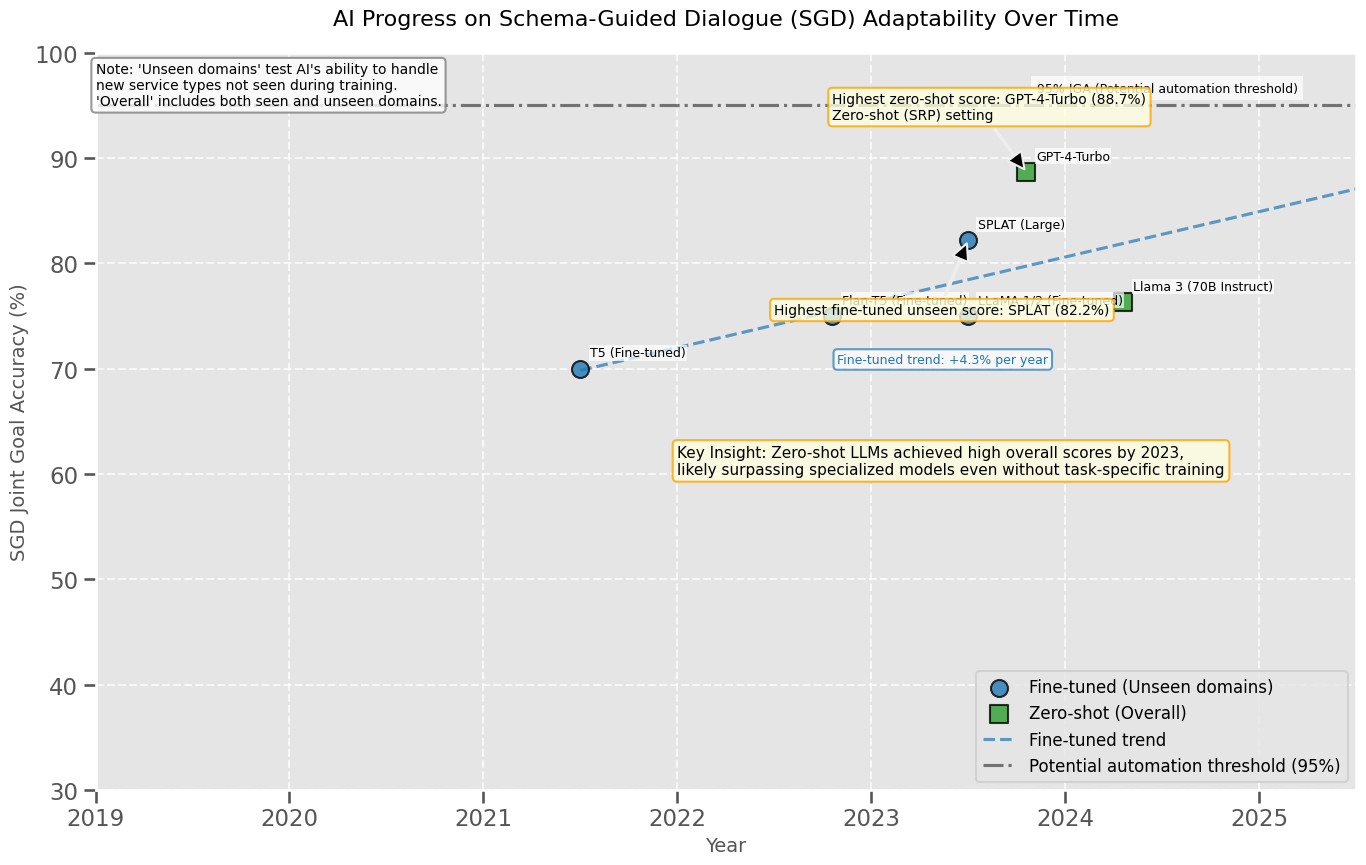

Generating Plot B: MultiWOZ JGA Fine-tuned (Complex Tracking)


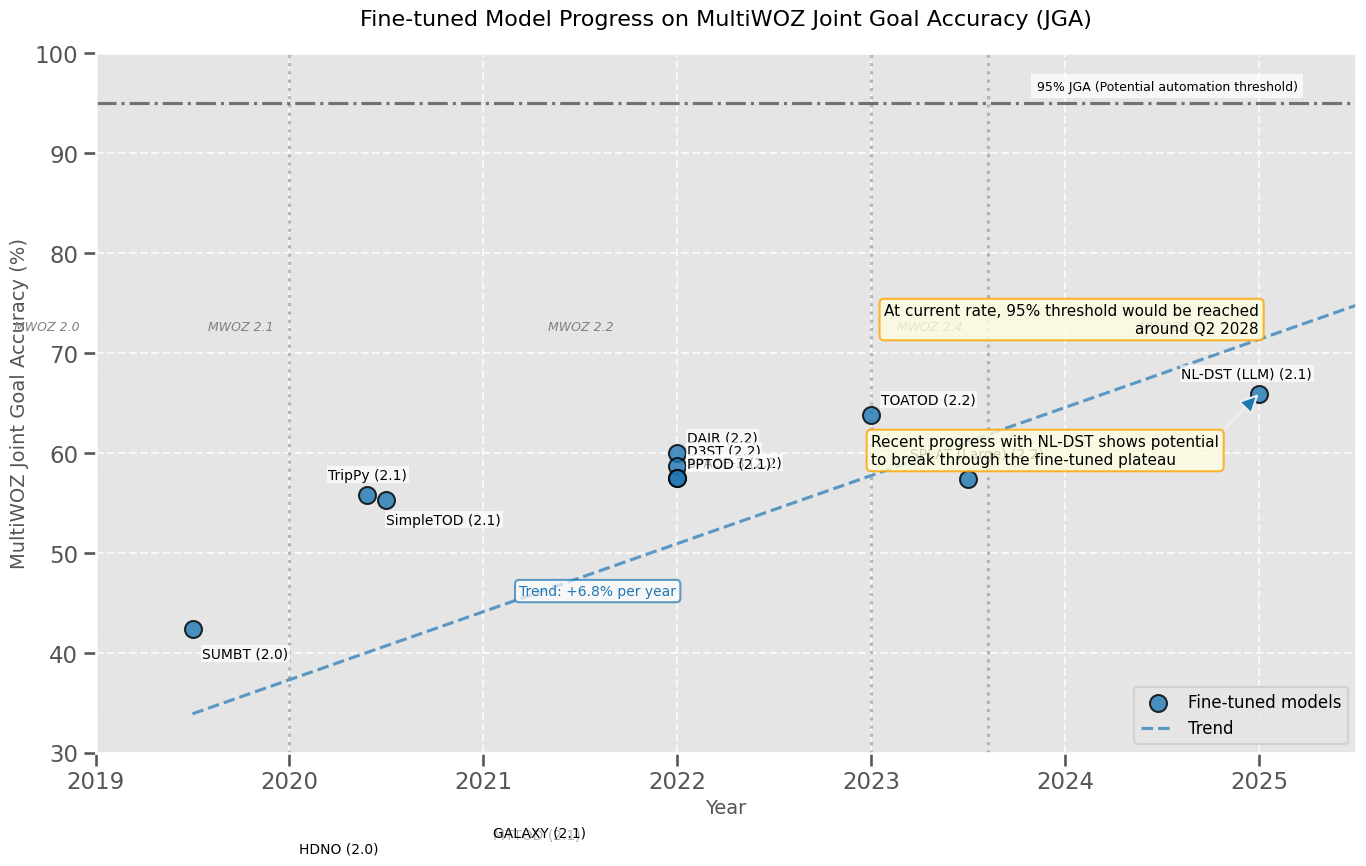

Generating Plot C: MultiWOZ JGA Zero/Few-Shot


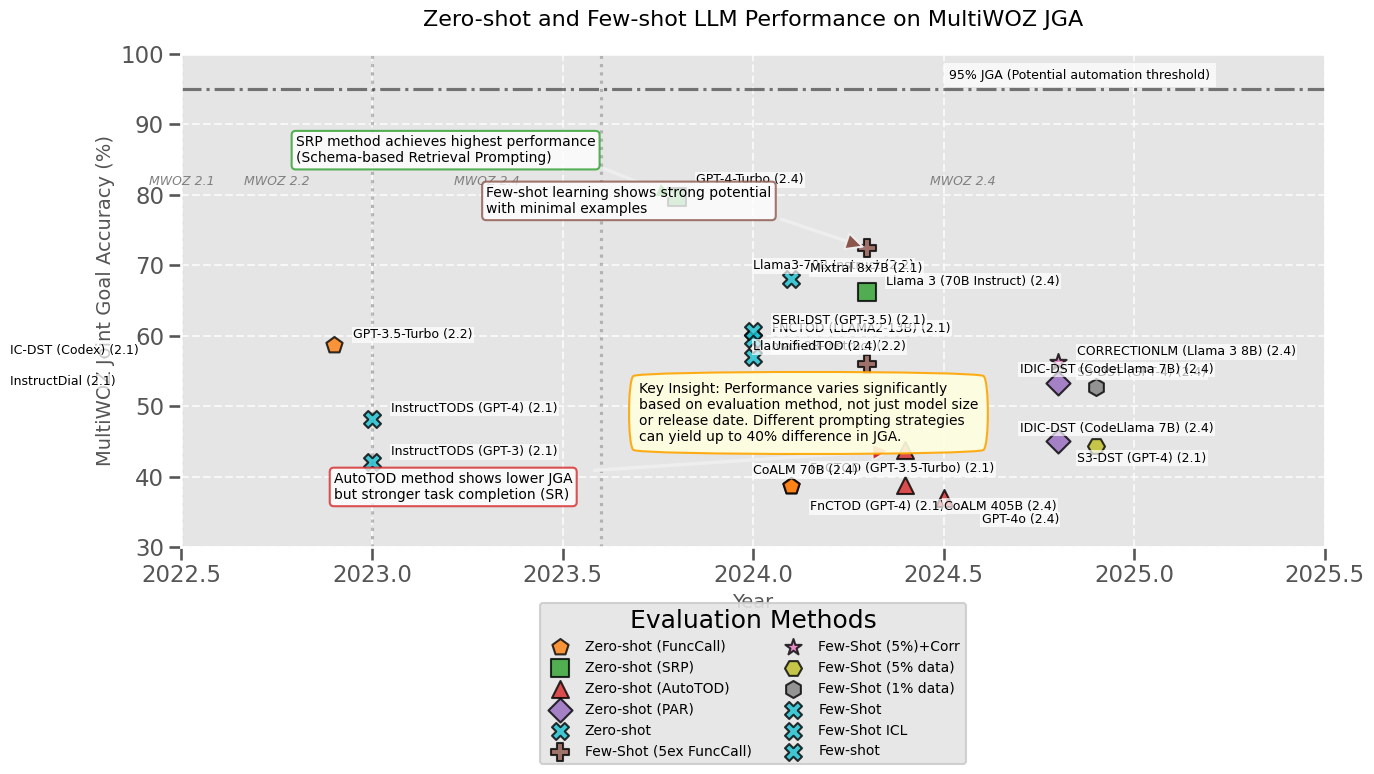

Generating Plot D: MultiWOZ SR (Task Completion)


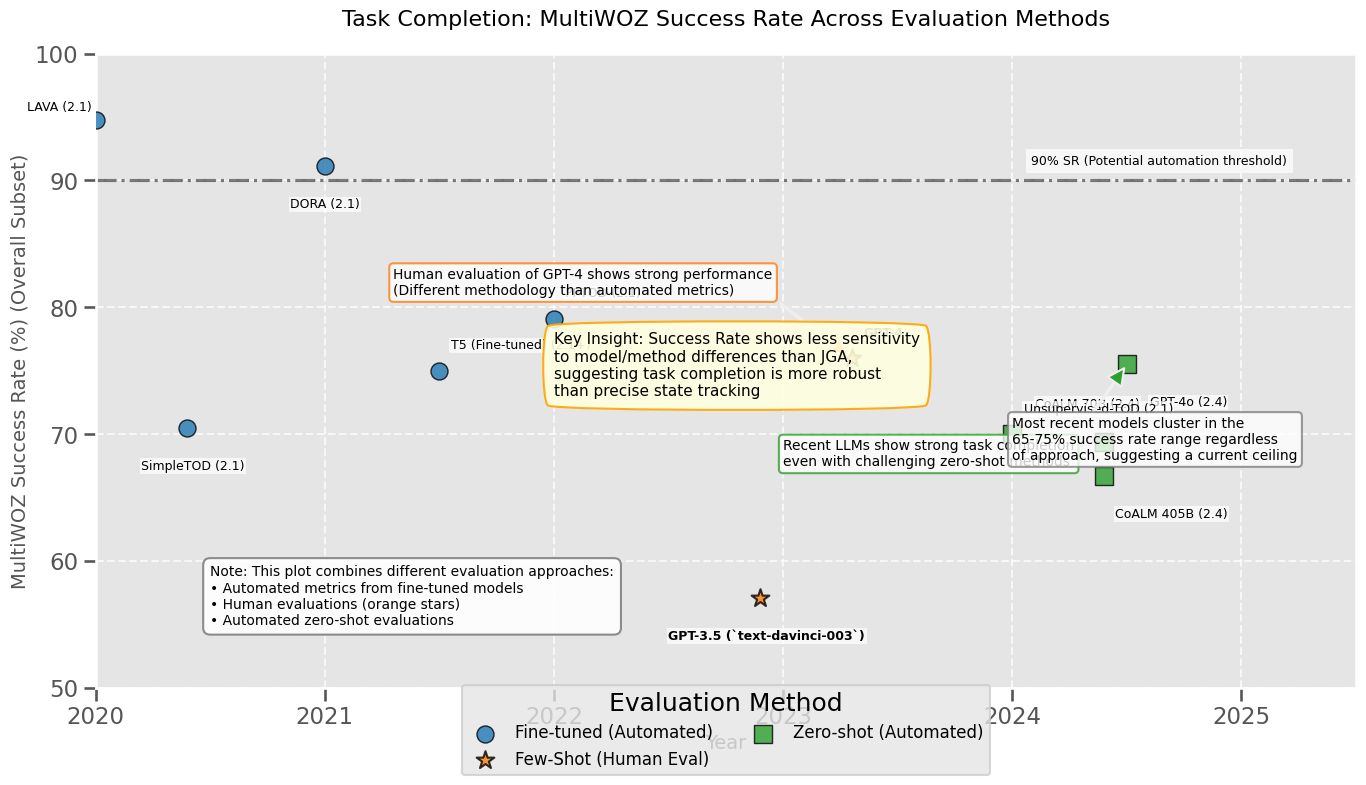

Generating revised forecast
Saved forecast to csr_ai_forecast_revised/revised_forecast.md

REVISED FORECAST SUMMARY
## Revised AI Capability Forecast for Customer Service

### Fine-tuned Model Trends

* **Fine-tuned Adaptability (SGD Unseen):** Current trend (+4.3%/year) suggests 95% threshold could be reached around **Q2 2027**
* **Fine-tuned Complex Tracking (MultiWOZ JGA):** Current trend (+6.8%/year) suggests 95% threshold could be reached around **Q2 2028**
* **Fine-tuned Task Completion (MultiWOZ SR):** Some fine-tuned models already exceed 90% success rate

### Zero-shot and Few-shot LLM Performance

* **Zero-shot SRP Method:** Best performance achieved by GPT-4-Turbo with 79.6% JGA
  * This method shows the most promise among zero-shot approaches
  * Current gap to 95% threshold: 15.4%
* **Few-shot Learning:** Best performance achieved by Llama3-70B-Instruct with 72.4% JGA using Few-Shot (5ex FuncCall)
  * Few-shot approaches show significant potential with minimal examples
  *

In [25]:
# --- Main execution ---
if __name__ == "__main__":
    # Use a standard style for plots
    plt.style.use('ggplot')
    sns.set_context("talk")

    # Load data from CSV
    df = load_data('updated_dialogue_benchmarks.csv')

    if df is not None:
        # Print data summary
        print_data_summary(df)

        # Create output directory if it doesn't exist
        output_dir = 'csr_ai_forecast_revised'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"Created output directory: {output_dir}")

        # Create all revised plots and generate forecast
        plots_and_forecast = create_revised_analysis(df, show_plots=True, save_dir=output_dir)

        print(f"\nAll revised plots and forecast have been generated successfully in {output_dir}!")
        print("The new approach provides a more nuanced view of AI progress by:")
        print("1. Separating different evaluation methods rather than forcing them onto a single trendline")
        print("2. Focusing on specific subsets of the data for forecasting")
        print("3. Providing both quantitative projections (where possible) and qualitative assessments")
        print("4. Being more transparent about the limitations and variations in the data")
    else:
        print("Failed to load data. Please check the file path.")